In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [98]:
#read car-parts data
df_car=pd.read_csv('../data/out.csv')
df_car=df_car.drop(df_car.columns[0], axis=1)
#read dent prediction data
df_dent=pd.read_csv('dent_data_out.csv')

In [99]:
df_car=df_car.rename(columns={"name": "image_name"})

In [100]:
df_car.head()

,image_name,num,parts
0,https:__s3.amazonaws.com_mc-imt_vehicle_2018W3...,17,"['tyre', 'alloy_wheel', 'door', 'window', 'rbu..."
1,https:__s3.amazonaws.com_mc-ai_dataset_india_2...,11,"['rbu_rear_bumper', 'door', 'blp_back_license_..."
2,https:__s3.amazonaws.com_mc-ai_vn_car_thinh_an...,1,['door']
3,https:__s3.amazonaws.com_mc-ai_dataset_india_2...,11,"['door', 'tyre', 'handle', 'window', 'alloy_wh..."
4,https:__mc-ai.s3.amazonaws.com_vn_car_an_1_anh...,3,"['door', 'rocker_panel', 'fender']"


In [101]:
df_dent.head()

,image_name,image_id,annotated_poly,predicted_poly,fp_check,tp,fp,fn
0,https:__s3.amazonaws.com_mc-imt_vehicle_2018W3...,1437,"[[82.64285714285717, 183.24020442930154, 30.42...","[[[(82, 172), (115, 244)], [(186, 231), (242, ...",1,1,1,1
1,https:__s3.amazonaws.com_mc-ai_dataset_india_2...,1332,"[[75.5492925781018, 294.72143861890993, 105.75...",[],0,0,0,1
2,https:__s3.amazonaws.com_mc-ai_vn_car_thinh_an...,461,"[[362.6429098868926, 122.37361554932954, 464.7...","[[[(731, 13), (1084, 418)], [(513, 373), (923,...",1,1,1,0
3,https:__s3.amazonaws.com_mc-ai_dataset_india_2...,1200,"[[137.35541374869914, 219.11458859911528, 14.0...","[[[(151, 212), (234, 311)], [(311, 385), (333,...",1,0,3,1
4,https:__mc-ai.s3.amazonaws.com_vn_car_an_1_anh...,326,"[[264.23135464231353, 232.45436105476674, 247....",[],0,0,0,1


In [102]:
df = pd.concat([df_car, df_dent], axis=1, sort=False)

In [112]:
df.head(10)

,image_name,num,parts,image_name,image_id,annotated_poly,predicted_poly,fp_check,tp,fp,fn,precision,recall,f1-score
0,https:__s3.amazonaws.com_mc-imt_vehicle_2018W3...,17,"['tyre', 'alloy_wheel', 'door', 'window', 'rbu...",https:__s3.amazonaws.com_mc-imt_vehicle_2018W3...,1437,"[[82.64285714285717, 183.24020442930154, 30.42...","[[[(82, 172), (115, 244)], [(186, 231), (242, ...",1,1,1,1,0.5,0.5,0.500000
1,https:__s3.amazonaws.com_mc-ai_dataset_india_2...,11,"['rbu_rear_bumper', 'door', 'blp_back_license_...",https:__s3.amazonaws.com_mc-ai_dataset_india_2...,1332,"[[75.5492925781018, 294.72143861890993, 105.75...",[],0,0,0,1,0.0,0.0,0.000000
2,https:__s3.amazonaws.com_mc-ai_vn_car_thinh_an...,1,['door'],https:__s3.amazonaws.com_mc-ai_vn_car_thinh_an...,461,"[[362.6429098868926, 122.37361554932954, 464.7...","[[[(731, 13), (1084, 418)], [(513, 373), (923,...",1,1,1,0,0.5,1.0,0.666667
3,https:__s3.amazonaws.com_mc-ai_dataset_india_2...,11,"['door', 'tyre', 'handle', 'window', 'alloy_wh...",https:__s3.amazonaws.com_mc-ai_dataset_india_2...,1200,"[[137.35541374869914, 219.11458859911528, 14.0...","[[[(151, 212), (234, 311)], [(311, 385), (333,...",1,0,3,1,0.0,0.0,0.000000
4,https:__mc-ai.s3.amazonaws.com_vn_car_an_1_anh...,3,"['door', 'rocker_panel', 'fender']",https:__mc-ai.s3.amazonaws.com_vn_car_an_1_anh...,326,"[[264.23135464231353, 232.45436105476674, 247....",[],0,0,0,1,0.0,0.0,0.000000
5,https:__s3.amazonaws.com_mc-ai_dataset_india_2...,16,"['hood', 'hli_head_light', 'door', 'fender', '...",https:__s3.amazonaws.com_mc-ai_dataset_india_2...,822,"[[290.19846582776717, 310.88719584923666, 53.7...","[[[(470, 260), (639, 376)], [(306, 311), (342,...",0,2,0,0,1.0,1.0,1.000000
6,https:__s3.amazonaws.com_mc-ai_vn_car_thinh_an...,3,"['tyre', 'door', 'rocker_panel']",https:__s3.amazonaws.com_mc-ai_vn_car_thinh_an...,317,"[[556.9228413544542, 410.32106155131584, 235.5...",[],0,0,0,1,0.0,0.0,0.000000
7,https:__s3.amazonaws.com_mc-ai_vn_car_thinh_an...,6,"['tyre', 'rbu_rear_bumper', 'alloy_wheel', 'tl...",https:__s3.amazonaws.com_mc-ai_vn_car_thinh_an...,554,"[[701.5617503707608, 173.01855674551624, 314.3...","[[[(558, 600), (769, 689)], [(785, 102), (983,...",1,1,1,0,0.5,1.0,0.666667
8,https:__s3.amazonaws.com_mc-ai_dataset_KBC_unz...,14,"['rocker_panel', 'door', 'alloy_wheel', 'tyre'...",https:__s3.amazonaws.com_mc-ai_dataset_KBC_unz...,281,"[[996.6357243319269, 295.0087749219266, 239.07...","[[[(987, 298), (1237, 523)], [(763, 298), (126...",0,1,0,0,1.0,1.0,1.000000
9,https:__s3.amazonaws.com_mc-imt_vehicle_2019Z5...,3,"['door', 'rocker_panel', 'rbu_rear_bumper']",https:__s3.amazonaws.com_mc-imt_vehicle_2019Z5...,82,"[[135.18539959391828, 200.92137775926858, 108....","[[[(64, 182), (328, 345)]]]",0,1,0,1,1.0,0.5,0.666667


In [104]:
df['precision']=df['tp']/(df['tp']+df['fp'])
df['recall']=df['tp']/(df['tp']+df['fn'])
df['f1-score']=2*(df['precision']*df['recall'])/ (df['precision']+df['recall'])

In [105]:
df=df.fillna(0)

In [106]:
result_num_parts = df.groupby('num').mean()[['precision','recall','f1-score']]

In [107]:
result_num_parts['num_parts']=result_num_parts.index

In [108]:
result_num_parts

,precision,recall,f1-score,num_parts
num,,,,
0,0.750000,0.875000,0.791667,0
1,0.549479,0.593750,0.548958,1
2,0.552288,0.540850,0.534641,2
3,0.603070,0.631579,0.599561,3
4,0.617232,0.615113,0.598870,4
5,0.628968,0.623677,0.605556,5
6,0.630096,0.640887,0.617540,6
7,0.793249,0.733966,0.736709,7
8,0.742798,0.687243,0.696296,8


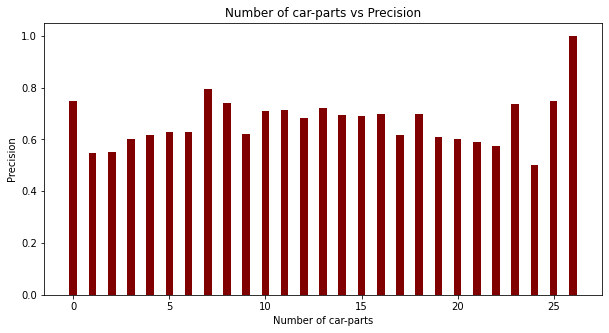

In [109]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(result_num_parts['num_parts'], result_num_parts['precision'], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Number of car-parts") 
plt.ylabel("Precision") 
plt.title("Number of car-parts vs Precision") 
plt.show() 

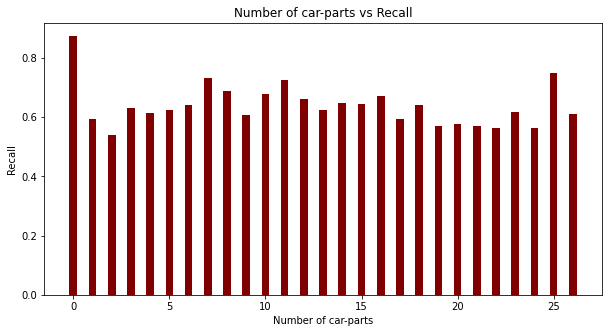

In [110]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(result_num_parts['num_parts'], result_num_parts['recall'], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Number of car-parts") 
plt.ylabel("Recall") 
plt.title("Number of car-parts vs Recall") 
plt.show() 

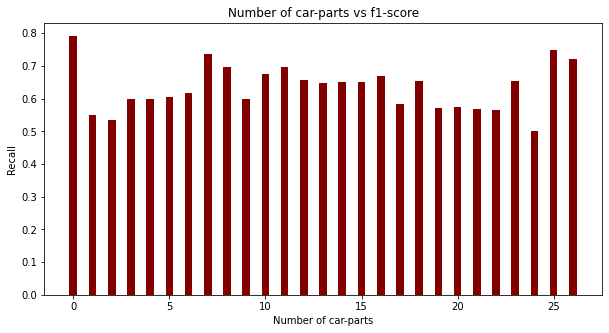

In [111]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(result_num_parts['num_parts'], result_num_parts['f1-score'], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Number of car-parts") 
plt.ylabel("Recall") 
plt.title("Number of car-parts vs f1-score") 
plt.show() 